# Importing the packages


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Raw Data

In [6]:
raw_data=pd.read_csv('2.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [7]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [8]:
raw_data.Brand.unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Cleaning the datasets


### Exploring data with statistics

In [9]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determinig the variables of our interest

In [10]:
data=raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing Datas

In [11]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [12]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
data_no_mv=data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring PDF's

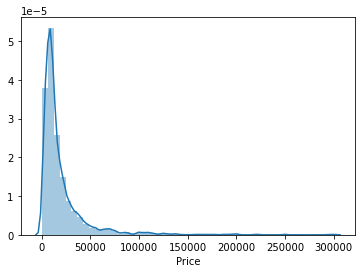

In [14]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [15]:
q=data_no_mv['Price'].quantile(0.98)

In [16]:
data_1=data_no_mv[data_no_mv['Price']<q]

In [17]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1515,NaN,NaN,1818,3572,NaN
mean,NaN,16840.689820,NaN,166.739538,2.738415,NaN,NaN,2006.197312
std,NaN,16332.966734,NaN,102.042365,4.980975,NaN,NaN,6.640292
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11250.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20800.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


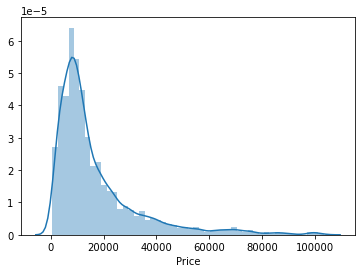

In [18]:
sns.distplot(data_1['Price'])

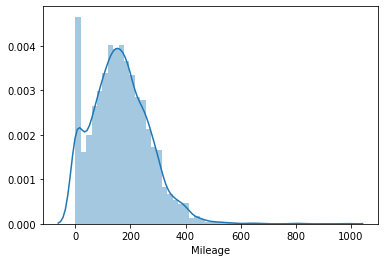

In [19]:
sns.distplot(data_no_mv['Mileage'])

In [20]:
z=data_1['Mileage'].quantile(0.98)
data_2=data_1[data_1['Mileage']<z]

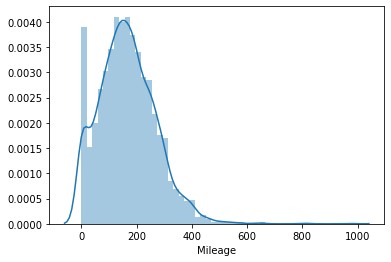

In [21]:
sns.distplot(data_1['Mileage'])

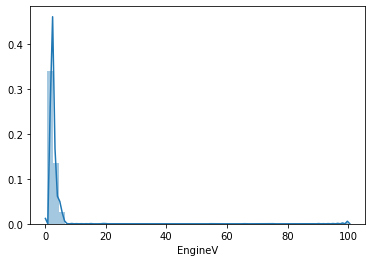

In [22]:
sns.distplot(data_no_mv['EngineV'])

In [23]:
z=data_2['EngineV'].quantile(0.98)
data_3=data_2[data_2['EngineV']<z]

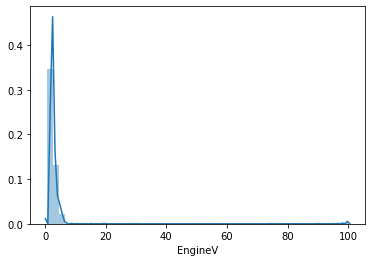

In [24]:
sns.distplot(data_2['EngineV'])

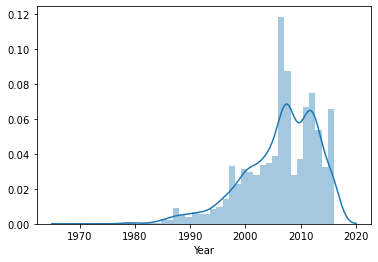

In [25]:
sns.distplot(data_no_mv['Year'])

In [26]:
z=data_3['Year'].quantile(0.02)
data_4=data_3[data_3['Year']>z]

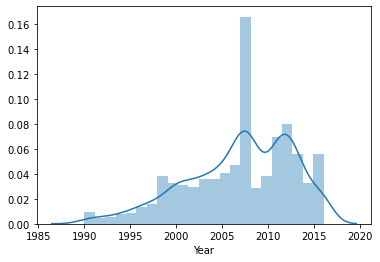

In [27]:
sns.distplot(data_4['Year'])

In [28]:
data_cleaned=data_4.reset_index(drop=True)

In [29]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3670,3670.000000,3670,3670.000000,3670.000000,3670,3670,3670.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,831,NaN,1368,NaN,NaN,1740,3315,NaN
mean,NaN,17013.927005,NaN,159.597003,2.375760,NaN,NaN,2006.890463
std,NaN,16156.123426,NaN,91.209574,0.831263,NaN,NaN,5.764147
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1990.000000
25%,NaN,7300.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.050000,NaN,NaN,2008.000000
75%,NaN,20708.437500,NaN,223.750000,3.000000,NaN,NaN,2012.000000


### Checking OLS assumptions

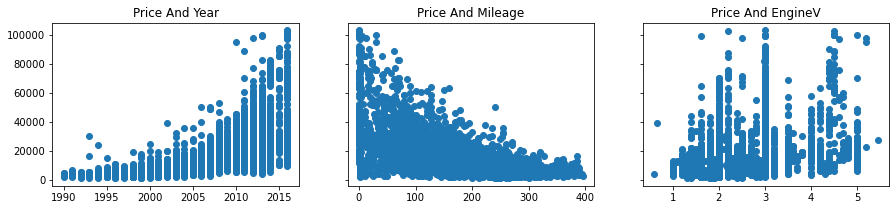

In [30]:
f,(ax1,ax2,ax3)=plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price And Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Price And Mileage')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title('Price And EngineV')
plt.show()

### Relaxing assumptions

In [31]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['Log_Price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3665,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3666,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3667,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3668,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


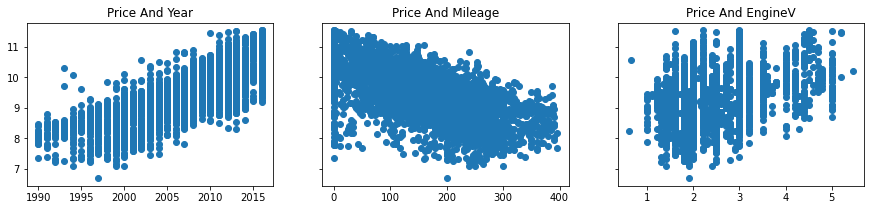

In [32]:
f,(ax1,ax2,ax3)=plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Log_Price'])
ax1.set_title('Price And Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Log_Price'])
ax2.set_title('Price And Mileage')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['Log_Price'])
ax3.set_title('Price And EngineV')
plt.show()

In [33]:
data_cleaned= data_cleaned.drop(['Price'], axis=1)

### Multicollinearity 

In [34]:
data_cleaned.columns.unique()

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'Log_Price'],
      dtype='object')

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage', 'Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features']=variables.columns

In [38]:
vif

,VIF,Features
0,4.054400,Mileage
1,11.530893,Year
2,9.206167,EngineV


In [39]:
no_multicollinearity_data=data_cleaned.drop(['Year'], axis=1)

In [40]:
no_multicollinearity_data


,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,9.560997
...,...,...,...,...,...,...,...
3665,Renault,sedan,152,1.6,Petrol,yes,8.824678
3666,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3667,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3668,BMW,sedan,1,3.5,Petrol,yes,8.779557


## Creating dummy variable

In [45]:
data_with_dummies=pd.get_dummies(no_multicollinearity_data,drop_first=True)

In [46]:
data_with_dummies

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,152,1.6,8.824678,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3666,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3667,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3668,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [50]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [51]:
cols=['Log_Price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [52]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,8.824678,152,1.6,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3666,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3667,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3668,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear Regression Model

### Declaring the inputs and targets

In [54]:
targets=data_preprocessed['Log_Price']
inputs=data_preprocessed.drop(['Log_Price'], axis=1)

### Scaling the Data

In [57]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(inputs)



StandardScaler()

In [58]:
inputs_scaled=scaler.transform(inputs)

## Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

x_train,xtest,y_train,y_test=train_test_split(inputs_scaled,targets, test_size=0.2, random_state=42)

## Creating regression model

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [65]:
y_hat=reg.predict(x_train)

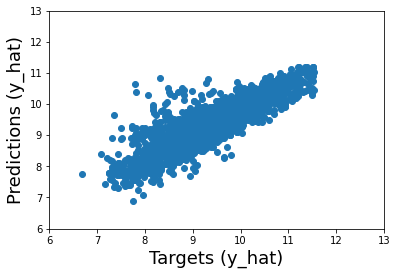

In [66]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_hat)',size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDFs')

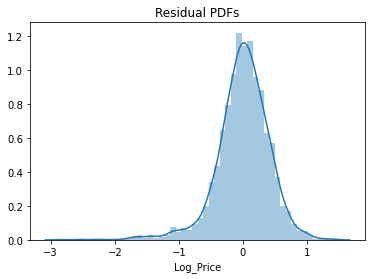

In [69]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDFs')

In [70]:
reg.score(x_train,y_train)

0.750017539656886

### Finding weights and bias

In [71]:
reg.intercept_

9.395625850075504

In [72]:
reg.coef_

array([-0.4306527 ,  0.1914572 ,  0.00785822, -0.00480526, -0.14231118,
       -0.18876297, -0.06125328, -0.09008573, -0.14451213, -0.0906543 ,
       -0.18382294, -0.11359238, -0.14631045, -0.11618187, -0.02130917,
       -0.13856341,  0.33184991])

In [76]:
reg_summary=pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.430653
1,EngineV,0.191457
2,Brand_BMW,0.007858
3,Brand_Mercedes-Benz,-0.004805
4,Brand_Mitsubishi,-0.142311
5,Brand_Renault,-0.188763
6,Brand_Toyota,-0.061253
7,Brand_Volkswagen,-0.090086
8,Body_hatch,-0.144512
9,Body_other,-0.090654


In [79]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [81]:
y_hat_test=reg.predict(xtest)

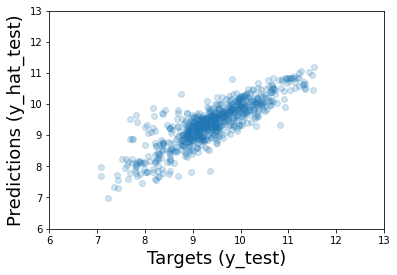

In [83]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [84]:
df_pf=pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf

,Predictions
0,9.622300
1,9.180484
2,10.835802
3,10.834422
4,10.177783
...,...
729,9.962629
730,9.552948
731,9.876811
732,10.262096


In [85]:
df_pf=pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,15097.732439
1,9705.849994
2,50807.646910
3,50737.575769
4,26312.071240


In [86]:
df_pf['Targets']=np.exp(y_test)
df_pf.head()

,Predictions,Targets
0,15097.732439,4200.0
1,9705.849994,NaN
2,50807.646910,NaN
3,50737.575769,NaN
4,26312.071240,NaN


In [88]:
y_test=y_test.reset_index(drop=True)

In [89]:
y_test.head()

0    10.373491
1     9.099409
2    11.049301
3    11.218554
4    10.915088
Name: Log_Price, dtype: float64

In [90]:
df_pf['Targets']=np.exp(y_test)
df_pf

,Predictions,Targets
0,15097.732439,32000.0
1,9705.849994,8950.0
2,50807.646910,62900.0
3,50737.575769,74500.0
4,26312.071240,55000.0
...,...,...
729,21218.500600,24996.0
730,14086.153760,14300.0
731,19473.517986,11500.0
732,28626.725343,34000.0


In [93]:
df_pf['Residual']=df_pf['Targets'] - df_pf['Predictions']

In [94]:
df_pf['Difference5']= df_pf ['Residual']/ df_pf['Targets'] * 100

In [95]:
df_pf

,Predictions,Targets,Residual,Difference5
0,15097.732439,32000.0,16902.267561,52.819586
1,9705.849994,8950.0,-755.849994,-8.445251
2,50807.646910,62900.0,12092.353090,19.224727
3,50737.575769,74500.0,23762.424231,31.895871
4,26312.071240,55000.0,28687.928760,52.159870
...,...,...,...,...
729,21218.500600,24996.0,3777.499400,15.112416
730,14086.153760,14300.0,213.846240,1.495428
731,19473.517986,11500.0,-7973.517986,-69.334939
732,28626.725343,34000.0,5373.274657,15.803749


In [96]:
df_pf.describe()

,Predictions,Targets,Residual,Difference5
count,734.000000,734.000000,734.000000,734.000000
mean,15074.485613,16607.531499,1533.045885,-9.835867
std,10873.731840,15642.238972,8282.096783,61.043649
min,1083.008991,1199.000000,-31520.693543,-527.854376
25%,7964.435350,7500.000000,-2179.445555,-24.514646
50%,12252.377029,11550.000000,104.749616,1.603949
75%,18801.871533,20500.000000,3241.305490,22.451065
max,74197.433518,102999.000000,64725.942306,78.150883
